In [39]:
import tensorflow as tf

In [63]:
from sklearn.metrics import classification_report

In [2]:
pip install tensorflow

  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.3 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.3 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.26.1 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.26.1 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.26.1 which is incompatible.


In [3]:
import tensorflow as tf

C:\Users\jprin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [32]:
from tensorflow.keras import datasets, layers, models 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 31s 0us/step


In [13]:
X_train.shape[0]

50000

In [14]:
X_test.shape[0]

10000

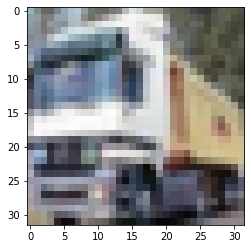

In [20]:
plt.imshow(X_train[1])

In [22]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
classes = ["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
def plot_sample(X,y,index):
    plt.figure (figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

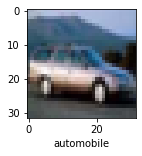

In [29]:
plot_sample(X_train,y_train,4)

In [30]:
X_train = X_train/255
X_test = X_test/255

In [43]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = "relu", input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    
    
    #dense
    layers.Flatten(),
    layers.Dense (62, activation = "relu"),
    layers.Dense (10, activation = "softmax")])

In [44]:
cnn.compile (optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = "accuracy")

In [45]:
cnn.fit(X_train,y_train, epochs = 10)

Epoch 1/10


1563/1563 [==============================] - 15s 9ms/step - loss: 1.4726 - accuracy: 0.4705
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1045 - accuracy: 0.6135
Epoch 3/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9680 - accuracy: 0.6635
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.8771 - accuracy: 0.6969
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8119 - accuracy: 0.7193
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7541 - accuracy: 0.7371
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7017 - accuracy: 0.7560
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6551 - accuracy: 0.7714
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6184 - accuracy: 0.7847
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step -

In [46]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9106 - accuracy: 0.7032


[0.910627543926239, 0.7031999826431274]

In [47]:
y_test = y_test.reshape(-1,)

In [50]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

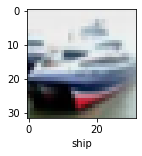

In [51]:
plot_sample(X_test,y_test,1)

In [52]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [53]:
np.argmax(y_pred[0])

3

In [61]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[50:60]

[9, 8, 2, 3, 8, 8, 5, 7, 2, 3]

In [60]:
y_test[50:60]

array([9, 8, 0, 3, 8, 8, 7, 7, 4, 6], dtype=uint8)

In [67]:
print ("Classification Report : \n", classification_report(y_test,y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.68      0.73      1000
           1       0.90      0.74      0.81      1000
           2       0.62      0.59      0.60      1000
           3       0.48      0.58      0.52      1000
           4       0.63      0.67      0.65      1000
           5       0.62      0.58      0.60      1000
           6       0.79      0.77      0.78      1000
           7       0.72      0.77      0.74      1000
           8       0.83      0.81      0.82      1000
           9       0.74      0.84      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.71     10000
weighted avg       0.71      0.70      0.71     10000

